**Import liberies**

In [1]:
# A library for data manipulation and analysis, providing powerful data structures like DataFrames.
import pandas as pd

# A library for numerical computations, supporting arrays, matrices, and a broad range of mathematical functions.
import numpy as np

# A plotting library that offers extensive functionality for creating static, animated, and interactive visualizations.
from matplotlib import pyplot as plt

# Provides tools for interacting with the operating system, such as file and directory handling.
import os

# Offers various functions for working with time, including time measurement, delays, and timestamps.
import time

# Provides methods for imputing missing values, useful for handling incomplete datasets.
from sklearn.impute import SimpleImputer

# Imports support vector regression and classification models, useful for both regression and classification tasks.
from sklearn.svm import SVR, SVC

# Classes for feature engineering and data standardization, essential for preparing data for machine learning models.
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Classes for performing hyperparameter tuning and splitting data into train-test sets while preserving group structures.
from sklearn.model_selection import GridSearchCV, GroupShuffleSplit, train_test_split

# A technique for reducing the dimensionality of datasets, preserving as much variance as possible.
from sklearn.decomposition import PCA

# An ensemble method for anomaly detection, identifying outliers in data.
from sklearn.ensemble import IsolationForest

# Provides metrics to evaluate the performance of regression models, including R² and mean squared error.
from sklearn.metrics import r2_score, mean_squared_error

# A transformer for applying custom functions to data, useful in imbalanced-learn pipelines.
from imblearn import FunctionSampler

# A class that combines multiple processing steps into a single sequence, making it easier to manage and reuse workflows.
from imblearn.pipeline import Pipeline as Pipeline

# Utilities for saving and loading Python objects efficiently, particularly useful for large datasets and models.
from joblib import dump, load

# Provides tools for generating random numbers and performing random operations, crucial for reproducibility in experiments.
import random

# Classes for creating decision tree models for both regression and classification tasks.
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Implements simple and efficient linear regression models.
from sklearn.linear_model import LinearRegression

# Implements protocols for serializing and de-serializing Python objects, making it easier to save and load complex data structures.
import pickle

# Module to control warnings in Python, with the ability to suppress specific types of warnings.
import warnings
from sklearn.exceptions import DataConversionWarning
# Suppress the specific warning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

**Upload train data - regular dfs, features df**

In [2]:
train_features_directory = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/train features df/train_features_df.pkl'
train_ppg_directory = "C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/org processed dfs/original_dfs.pkl"

with open(train_features_directory, 'rb') as f:
    train_features_df = pickle.load(f)

with open(train_ppg_directory, 'rb') as f:
    train_ppg_dfs = pickle.load(f)

**Upload test data - regular dfs, features df**

In [3]:
test_features_directory = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/test features df/test_features_df.pkl'
test_ppg_directory = "C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/test org processed dfs/test_original_dfs.pkl"

with open(test_features_directory, 'rb') as f:
    test_features_df = pickle.load(f)

with open(test_ppg_directory, 'rb') as f:
    test_ppg_dfs = pickle.load(f)

**split the data to X & Y**

In [4]:
def split_X_Y(ppg_dfs, features):
    """
    Splits the input DataFrames into separate components for subject IDs, predictors (X), and multiple outcome variables (Y).

    Parameters:
        ppg_dfs (list of DataFrames): List of DataFrames containing PPG signal data.
        features (DataFrame): DataFrame containing the features, including subject IDs and outcome variables.

    Returns:
        subjects (DataFrame): DataFrame containing the subject IDs.
        X_features (DataFrame): DataFrame containing predictor variables, excluding outcome and irrelevant columns.
        X_ppg (DataFrame): DataFrame containing PPG signal data as predictors, each row representing a 6000-sample segment.
        Y1 (DataFrame): DataFrame containing the values of the MAP outcome variable.
        Y2 (DataFrame): DataFrame containing the values of the DMAP outcome variable.
        Y3 (DataFrame): DataFrame containing the values of the SBP outcome variable.
        Y4 (DataFrame): DataFrame containing the values of the DSBP outcome variable.
        Y5 (DataFrame): DataFrame containing the values of the DBP outcome variable.
        Y6 (DataFrame): DataFrame containing the values of the DDBP outcome variable.
    """

    # Separate subject IDs
    subjects = pd.DataFrame(features[['ID']])

    # Separate the multiple outcome variables (Y)
    Y1 = pd.DataFrame(features['L1_MAP'])
    Y2 = pd.DataFrame(features['L2_DMAP'])
    Y3 = pd.DataFrame(features['L3_SBP'])
    Y4 = pd.DataFrame(features['L4_DSBP'])
    Y5 = pd.DataFrame(features['L5_DBP'])
    Y6 = pd.DataFrame(features['L6_DDBP'])

    # Remove the outcome and irrelevant columns to get predictors (X_features)
    X_features = features.drop(['L1_MAP','L2_DMAP','L3_SBP','L4_DSBP','L5_DBP','L6_DDBP','ID'], axis=1)

    # Initialize an empty DataFrame for X_ppg with column names as the index values (0-5999)
    X_ppg = pd.DataFrame(columns=range(6000))

    # Create rows with 6000 values (from index 250 to -250) for each PPG DataFrame
    for df in ppg_dfs:
        x = df['PLETH'][250:-250].values  # Extract the 6000 values as a vector
        X_ppg = pd.concat([X_ppg, pd.DataFrame([x], columns=range(6000))], ignore_index=True)

    return subjects, X_features, X_ppg, Y1, Y2, Y3, Y4, Y5, Y6

In [5]:
# Split the original train df to X & Y
subjects_train, X_features_train, X_ppg_train, Y1_train, Y2_train, Y3_train, Y4_train, Y5_train, Y6_train = split_X_Y(train_ppg_dfs,train_features_df)

# Split the original test df to X & Y
subjects_test, X_features_test, X_ppg_test, Y1_test, Y2_test, Y3_test, Y4_test, Y5_test, Y6_test = split_X_Y(train_ppg_dfs,train_features_df)

C:\Users\Idan Lichter\AppData\Local\Temp\ipykernel_4788\3323588766.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  X_ppg = pd.concat([X_ppg, pd.DataFrame([x], columns=range(6000))], ignore_index=True)
C:\Users\Idan Lichter\AppData\Local\Temp\ipykernel_4788\3323588766.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  X_ppg = pd.concat([X_ppg, pd.DataFrame([x], columns=range(6000))], ignore_index=True)


**A,B: removal of abnormal values from the set of features and labels**

In [6]:
def outlier_rejection(X, y, percentile=1):
    """
    Perform outlier rejection based on the given percentile or using the Isolation Forest method.

    Parameters:
    X (array-like): The input feature matrix (predictors).
    y (array-like): The input target variable (outcomes).
    percentile (float or str): The percentile threshold for outlier rejection.
                               If 'IsolationForest', the Isolation Forest method is used for outlier detection.
                               If a float value between 0 and 100, it is used as the percentile threshold.

    Returns:
    X_rejected (array-like): The feature matrix after outlier rejection.
    y_rejected (array-like): The target variable after outlier rejection.
    """
    all_data = np.c_[X, y]

    if percentile == 'IsolationForest':
        print(f'IsolationForest:', y.size)
        model = IsolationForest(max_samples=100, contamination=0.4)
        SI = SimpleImputer(missing_values=np.nan, strategy='mean')
        no_nan_all_data = SI.fit_transform(all_data)
        model.fit(no_nan_all_data)
        y_pred = model.predict(no_nan_all_data)
        bool_cond = y_pred == 1

    else:
        print(f'percentile={percentile}', y.size)
        lth = np.nanpercentile(all_data, 100 - percentile, axis=0)
        hth = np.nanpercentile(all_data, percentile, axis=0)
        bool_cond = np.prod((all_data < hth) * (all_data > lth), axis=1).astype('bool')

    # Return the data after outlier rejection
    return X[bool_cond], y[bool_cond]

**D,E,F,G: Pipeline & gridsearchCV**

Grid search that incorporates cross-validation against 10 data sets, each consisting of 80% training and 20% test.

This division was carried out using the Group Shuffle Split method which produces a number of predetermined random splits, where each of the splits contains a portion of the predetermined subgroups. In this case, the split was defined according to patient ID and labeling category so that in each group the percentage of different labeling was distributed similarly.

In this way, the training and test data sets contain segments from different patients so that the model avoids overfitting.

**Models:**

In [7]:
# Creating the pipeline for the model
regressor_pipe = Pipeline([
    ('Drop_Extreme_Values', FunctionSampler(func=outlier_rejection, validate=False)),  # Custom function for outlier rejection
    ('Imputing', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),  # Imputes missing values with 0
    ('Standard Scaler', StandardScaler()),  # Standardizes the features by removing mean and scaling to unit variance
    ('Dimension_reduction', PCA(svd_solver='full')),  # Principal Component Analysis for dimensionality reduction
    ('estimator',None )  # Support Vector Regression as the final estimator
])

In [8]:
param_grid1 = [
    {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.99, 0.9999],
        'estimator__C': [0.1, 1, 10],
        'estimator__kernel': ['linear','sigmoid', 'rbf'],
        'estimator':[SVR()]
    },
    {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.99, 0.9999],
        'estimator__C': [0.1, 1, 10],
        'estimator__kernel': ['poly'],
        'estimator__degree': [2, 3],
        'estimator':[SVR()]
    },
    {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.99, 0.9999],
        'estimator__max_depth': [None, 5, 10],
        'estimator__min_samples_split': [2, 5],
        'estimator__min_samples_leaf': [1, 2],
        'estimator':[DecisionTreeRegressor()]
    }
]

In [9]:
param_grid2 = [
    {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.999, 0.99999],
        'estimator__C': [0.1, 1, 10],
        'estimator__kernel': ['linear','sigmoid', 'rbf'],
        'estimator':[SVR()]
    },
    {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.999, 0.99999],
        'estimator__C': [0.1, 1, 10],
        'estimator__kernel': ['poly'],
        'estimator__degree': [4, 5],
        'estimator':[SVR()]
    },
    {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.999, 0.99999],
        'estimator__max_depth': [5, 10, 20],
        'estimator__min_samples_split': [5, 10],
        'estimator__min_samples_leaf': [4, 8],
        'estimator':[DecisionTreeRegressor()]
    }
]

In [10]:
param_grid3 = [
    {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.99, 0.999, 0.9999, 0.99999],
        'estimator__C': [100],
        'estimator__kernel': ['linear'],
        'estimator':[SVR()]
    },
    {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.99, 0.999, 0.9999, 0.99999],
        'estimator__C': [100],
        'estimator__kernel': ['poly'],
        'estimator__degree': [2, 3, 4, 5],
        'estimator':[SVR()]
    },
    {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.99, 0.999, 0.9999, 0.99999],
        'estimator__max_depth': [5, 10, 20],
        'estimator__min_samples_split': [5, 10],
        'estimator__min_samples_leaf': [4, 8],
        'estimator':[DecisionTreeRegressor()]
    }
]

In [11]:
param_grid4 = [
    {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.99, 0.99999],
        'estimator__C': np.logspace(-2, 3, 3),
        'estimator__kernel': ['linear', 'rbf'],
        'estimator':[SVR()]
    },
    {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.99, 0.99999],
        'estimator__C': np.logspace(-3, 2, 3),
        'estimator__kernel': ['poly'],
        'estimator__degree': [2, 3],
        'estimator':[SVR()]
    },
      {
        'Drop_Extreme_Values__kw_args': [{'percentile': 'IsolationForest'}],
        'Dimension_reduction__n_components': [0.99, 0.9999],
        'estimator__max_depth': [None, 10],
        'estimator__min_samples_split': [2, 10],
        'estimator__min_samples_leaf': [2, 8],
        'estimator':[DecisionTreeRegressor()]
    }
]

In [12]:
def fit_grid(X_train, X_test, y_train, y_test, subjects, pipe, param_grid, title, results_dir, test_size=0.2, n_splits=10, scoring="r2"):
    """
    Perform grid search, model fitting, and evaluation using cross-validation.

    Parameters:
    X_train (array-like): The training feature matrix.
    X_test (array-like): The testing feature matrix.
    y_train (array-like): The training target variable.
    y_test (array-like): The testing target variable.
    subjects (array-like): The array containing subject IDs for grouping during cross-validation.
    pipe (Pipeline): The sklearn pipeline containing the model to be optimized.
    param_grid (dict or list of dicts): The parameter grid to be explored during grid search.
    title (str): The title used for saving the results and plots.
    results_dir (str): The directory path where results will be saved.
    test_size (float, optional): The proportion of test data during cross-validation split. Default is 0.15.
    n_splits (int, optional): The number of cross-validation splits. Default is 10.
    scoring (str, optional): The scoring method used for model evaluation. Default is "r2".

    Returns:
    grid (GridSearchCV): The fitted GridSearchCV object.
    grid_frame (DataFrame): The DataFrame containing the results of the grid search.
    """

    start_time = time.time()

    # Split the train data into multiple splits with 20% test and 80% train based on the subject IDs
    cv_splitter = GroupShuffleSplit(test_size=test_size, n_splits=n_splits)
    split = cv_splitter.split(X_train, groups=subjects)

    # Perform grid search with cross-validation
    grid = GridSearchCV(pipe, param_grid, cv=split, return_train_score=True, scoring=scoring, n_jobs=-1,error_score='raise')
    grid.fit(X_train, y_train)

    # Save the best model from the grid search
    model_filename = os.path.join(results_dir, title + '_grid_model.sav')
    dump(grid.best_estimator_, model_filename)

    # Print the best parameters found during the grid search
    print(grid.best_params_)

    # Store the results of the grid search in a DataFrame
    gridframe = pd.DataFrame(grid.cv_results_)

    # Save the grid search results to a CSV file
    results_filename = os.path.join(results_dir, title + '_Table_Results.csv')
    gridframe.to_csv(results_filename)
    # Calculate the valid ranges of numbers to compute the score
    # based on the title of the outcome variable (e.g., SBP, DBP)
    if (title == 'SBP') or (title == 'DBP') or (title == 'MAP'):
        min_val_train = min_val_test = 10
        max_val_train = max_val_test = 290
    elif title == 'DMAP':
        min_val_train = y_train['L2_DMAP'] - 10
        max_val_train = 290 - y_train['L2_DMAP']
        min_val_test = y_test['L2_DMAP'] - 10
        max_val_test = 290 - y_test['L2_DMAP']
    elif title == 'DSBP':
        min_val_train = y_train['L4_DSBP'] - 10
        max_val_train = 290 - y_train['L4_DSBP']
        min_val_test = y_test['L4_DSBP'] - 10
        max_val_test = 290 - y_test['L4_DSBP']
    elif title == 'DDBP':
        min_val_train = y_train['L6_DDBP'] - 10
        max_val_train = 290 - y_train['L6_DDBP']
        min_val_test = y_test['L6_DDBP'] - 10
        max_val_test = 290 - y_test['L6_DDBP']

    # Plot the predicted and true values for train and test datasets
    plt.figure(figsize=(10, 8))

    plt.subplot(211)
    y_hat_train = grid.predict(X_train)
    ind_train = (y_hat_train > min_val_train) & (y_hat_train < max_val_train)
    plt.plot(y_train, label='y_train_true')
    plt.plot(y_hat_train, label='y_train_pred')
    plt.title(f"Train: {title} r2 scoring {r2_score(y_train[ind_train], y_hat_train[ind_train]):.3f}")
    plt.legend(loc='upper right')

    plt.subplot(212)
    y_hat_test = grid.predict(X_test)
    ind_test = (y_hat_test > min_val_test) & (y_hat_test < max_val_test)
    plt.plot(y_test, label='y_test_true')
    plt.plot(y_hat_test, label='y_test_pred')
    plt.title(f"Test: {title} r2 scoring {r2_score(y_test[ind_test], y_hat_test[ind_test]):.3f}")
    plt.legend(loc='upper right')

    # Save the plot
    plot_filename = os.path.join(results_dir, title + '_Prediction_Plot.png')
    plt.savefig(plot_filename)

    end_time = time.time()
    print(f"Execution time: {end_time - start_time:.0f} sec")

    return grid, gridframe

**Running the SVM predictive model on all the different labels and grids**

In [13]:
results_directory1 = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/Grid Results 1'
results_directory2 = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/Grid Results 2'
results_directory3 = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/Grid Results 3'
results_directory4 = 'C:/Users/Idan Lichter/OneDrive/Desktop/study/3rd year/Final Project/Grid Results 4'

In [ ]:
# Model predict MAP
regressor_grid_11, regressor_gridframe_11 = fit_grid(X_features_train, X_features_test, Y1_train, Y1_test, subjects_train,
                                                     regressor_pipe, param_grid1, 'MAP', results_directory1)
regressor_grid_12, regressor_gridframe_12 = fit_grid(X_features_train, X_features_test, Y1_train, Y1_test, subjects_train,
                                                     regressor_pipe, param_grid2, 'MAP', results_directory2)
regressor_grid_13, regressor_gridframe_13 = fit_grid(X_features_train, X_features_test, Y1_train, Y1_test, subjects_train,
                                                     regressor_pipe, param_grid3, 'MAP', results_directory3)
regressor_grid_14, regressor_gridframe_14 = fit_grid(X_features_train, X_features_test, Y1_train, Y1_test, subjects_train,
                                                     regressor_pipe, param_grid4, 'MAP', results_directory4)

# Model predict SBP
regressor_grid_21, regressor_gridframe_21 = fit_grid(X_features_train, X_features_test, Y2_train, Y2_test, subjects_train,
                                                     regressor_pipe, param_grid1, 'DMAP', results_directory1)
regressor_grid_22, regressor_gridframe_22 = fit_grid(X_features_train, X_features_test, Y2_train, Y2_test, subjects_train,
                                                     regressor_pipe, param_grid2, 'DMAP', results_directory2)
regressor_grid_23, regressor_gridframe_23 = fit_grid(X_features_train, X_features_test, Y2_train, Y2_test, subjects_train,
                                                     regressor_pipe, param_grid3, 'DMAP', results_directory3)
regressor_grid_24, regressor_gridframe_24 = fit_grid(X_features_train, X_features_test, Y2_train, Y2_test, subjects_train,
                                                     regressor_pipe, param_grid4, 'DMAP', results_directory4)

# Model predict DBP
regressor_grid_31, regressor_gridframe_31 = fit_grid(X_features_train, X_features_test, Y3_train, Y3_test, subjects_train,
                                                     regressor_pipe, param_grid1, 'SBP', results_directory1)
regressor_grid_32, regressor_gridframe_32 = fit_grid(X_features_train, X_features_test, Y3_train, Y3_test, subjects_train,
                                                     regressor_pipe, param_grid2, 'SBP', results_directory2)
regressor_grid_33, regressor_gridframe_33 = fit_grid(X_features_train, X_features_test, Y3_train, Y3_test, subjects_train,
                                                     regressor_pipe, param_grid3, 'SBP', results_directory3)
regressor_grid_34, regressor_gridframe_34 = fit_grid(X_features_train, X_features_test, Y3_train, Y3_test, subjects_train,
                                                     regressor_pipe, param_grid4, 'SBP', results_directory4)

# model predict DMAP
regressor_grid_41, regressor_gridframe_41 = fit_grid(X_features_train, X_features_test, Y4_train, Y4_test, subjects_train,
                                                     regressor_pipe, param_grid1, 'DSBP', results_directory1)
regressor_grid_42, regressor_gridframe_42 = fit_grid(X_features_train, X_features_test, Y4_train, Y4_test, subjects_train,
                                                     regressor_pipe, param_grid2, 'DSBP', results_directory2)
regressor_grid_43, regressor_gridframe_43 = fit_grid(X_features_train, X_features_test, Y4_train, Y4_test, subjects_train,
                                                     regressor_pipe, param_grid3, 'DSBP', results_directory3)
regressor_grid_44, regressor_gridframe_44 = fit_grid(X_features_train, X_features_test, Y4_train, Y4_test, subjects_train,
                                                     regressor_pipe, param_grid4, 'DSBP', results_directory4)

# Model predict DSBP
regressor_grid_51, regressor_gridframe_51 = fit_grid(X_features_train, X_features_test, Y5_train, Y5_test, subjects_train,
                                                     regressor_pipe, param_grid1, 'DBP', results_directory1)
regressor_grid_52, regressor_gridframe_52 = fit_grid(X_features_train, X_features_test, Y5_train, Y5_test, subjects_train,
                                                     regressor_pipe, param_grid2, 'DBP', results_directory2)
regressor_grid_53, regressor_gridframe_53 = fit_grid(X_features_train, X_features_test, Y5_train, Y5_test, subjects_train,
                                                     regressor_pipe, param_grid3, 'DBP', results_directory3)
regressor_grid_54, regressor_gridframe_54 = fit_grid(X_features_train, X_features_test, Y5_train, Y5_test, subjects_train,
                                                     regressor_pipe, param_grid4, 'DBP', results_directory4)

# Model predict DDBP
regressor_grid_61, regressor_gridframe_61 = fit_grid(X_features_train, X_features_test, Y6_train, Y6_test, subjects_train,
                                                     regressor_pipe, param_grid1, 'DDBP', results_directory1)
regressor_grid_62, regressor_gridframe_62 = fit_grid(X_features_train, X_features_test, Y6_train, Y6_test, subjects_train,
                                                     regressor_pipe, param_grid2, 'DDBP', results_directory2)
regressor_grid_63, regressor_gridframe_63 = fit_grid(X_features_train, X_features_test, Y6_train, Y6_test, subjects_train,
                                                     regressor_pipe, param_grid3, 'DDBP', results_directory3)
regressor_grid_64, regressor_gridframe_64 = fit_grid(X_features_train, X_features_test, Y6_train, Y6_test, subjects_train
                                                     , regressor_pipe, param_grid4, 'DDBP', results_directory4)

**Simple model**

**Downsample the data from 6000 samples to 600**

In [14]:
# Downsample the columns by selecting every 10th column
X_train_downsampled = X_ppg_train.iloc[:, ::10]
X_test_downsampled = X_ppg_test.iloc[:, ::10]

**split data to train and validation**

In [15]:
# Split X_train_downsampled into training and validation sets (80% train, 20% validation)
X_train_split, X_val_split = train_test_split(X_train_downsampled, test_size=0.2, random_state=42)

# List of Y train dataframes
Y_train_list = [Y1_train, Y2_train, Y3_train, Y4_train, Y5_train, Y6_train]

# Split each Y_train into training and validation sets
Y_train_list_split = []
Y_val_list_split = []

for Y_train in Y_train_list:
    Y_train_split, Y_val_split = train_test_split(Y_train, test_size=0.2, random_state=42)
    Y_train_list_split.append(Y_train_split)
    Y_val_list_split.append(Y_val_split)

**Linear regression model**

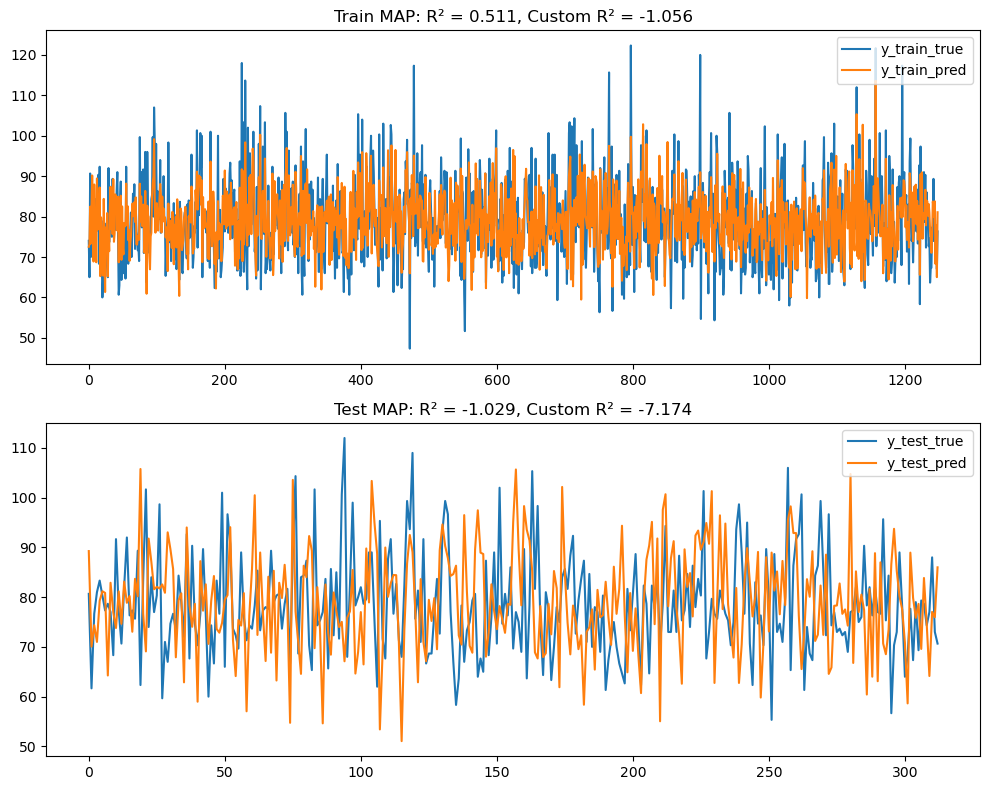

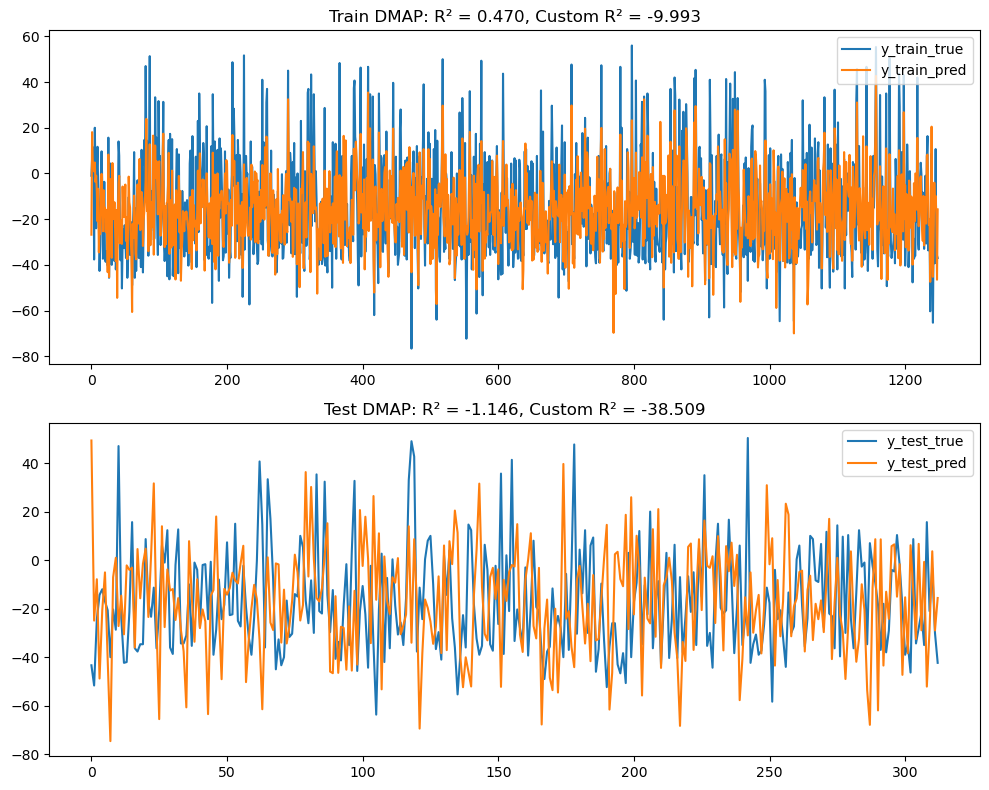

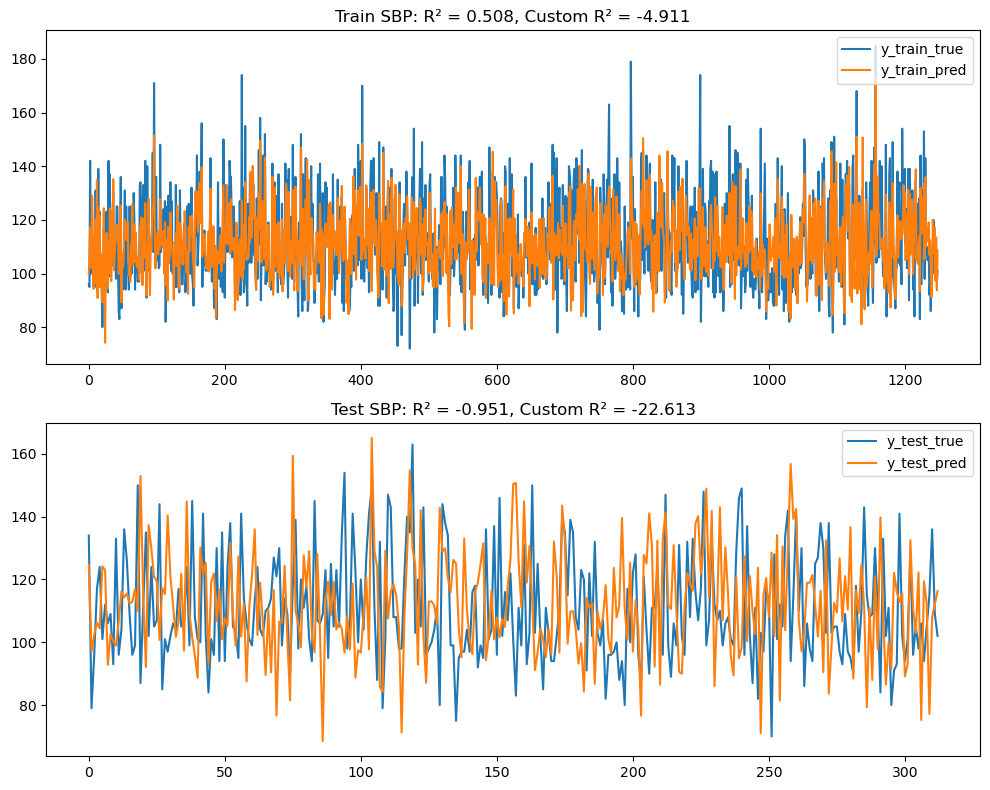

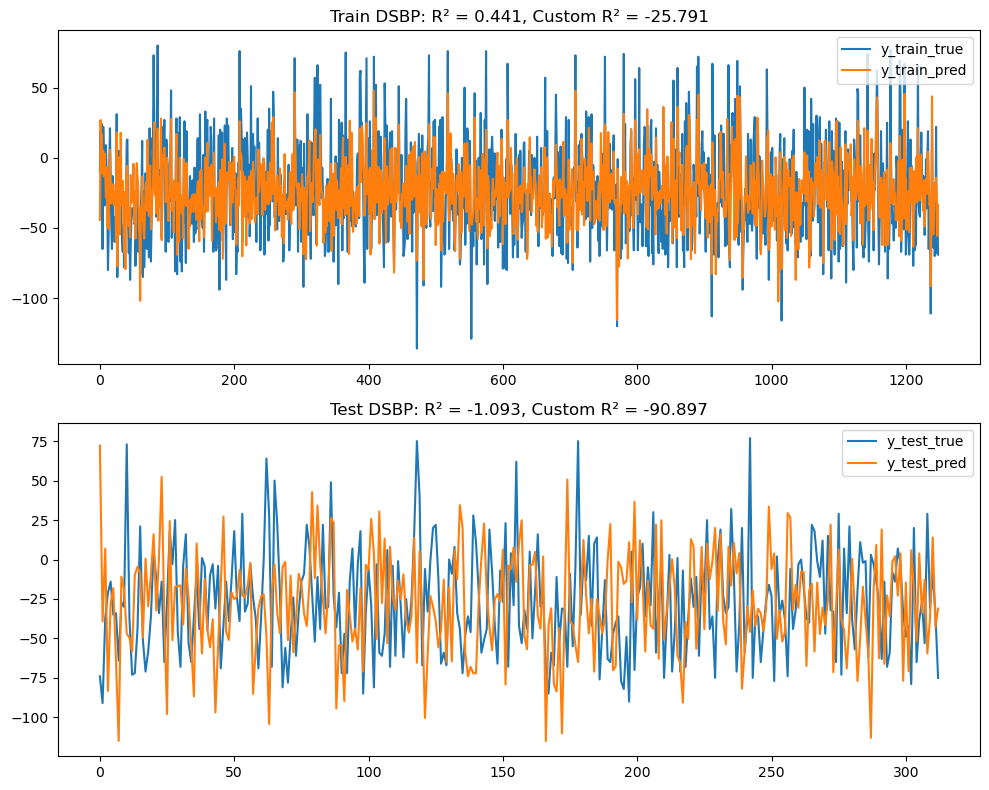

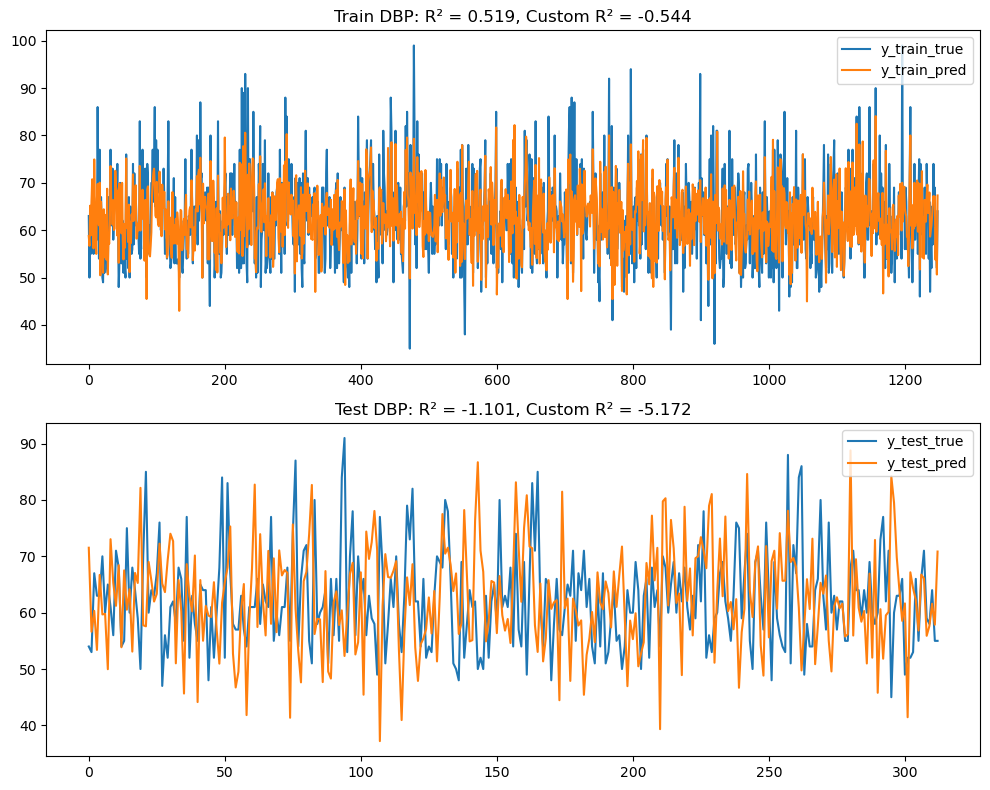

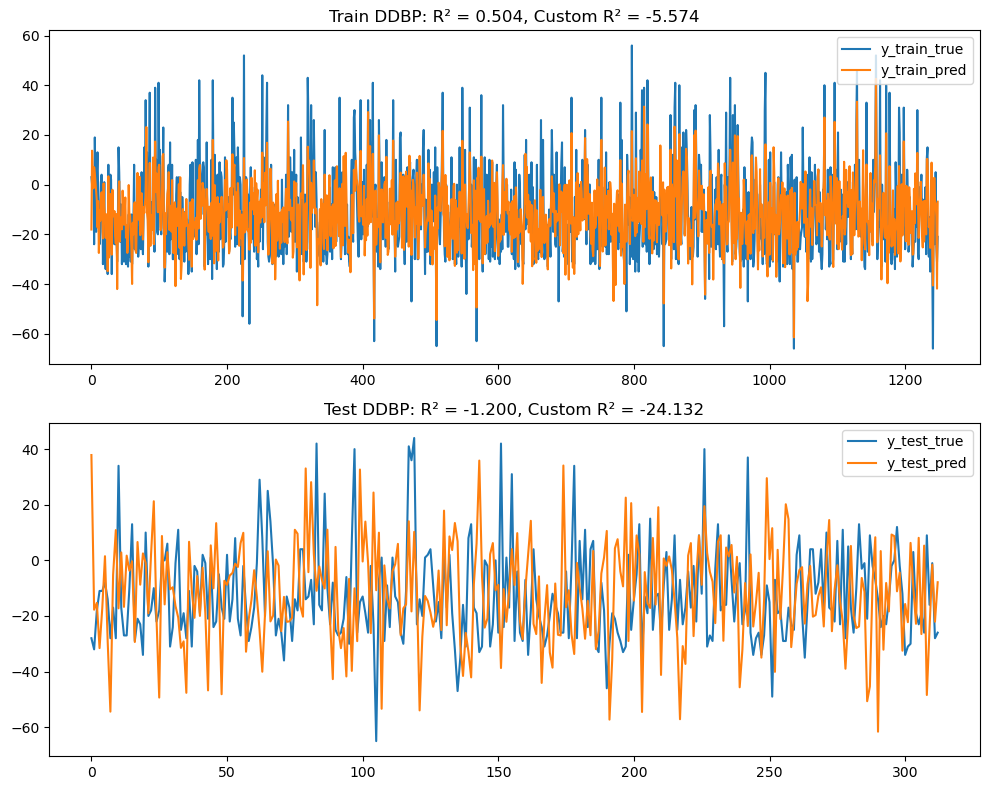

In [17]:
# Initialize the linear regression model
model = LinearRegression()
Y_names = ['MAP','DMAP', 'SBP', 'DSBP', 'DBP', 'DDBP']
for i, (Y_train, Y_val) in enumerate(zip(Y_train_list_split, Y_val_list_split), 1):
    # Fit the model
    model.fit(X_train_split, Y_train)

    # Predict Y_hat for training and validation sets
    Y_hat_train = model.predict(X_train_split)
    Y_hat_val = model.predict(X_val_split)

    # Classic R² calculation
    R2_train = r2_score(Y_train, Y_hat_train)
    R2_test = r2_score(Y_val, Y_hat_val)

    # Custom R² calculation (R2_5_test)
    d_train = Y_train.values
    d_hat_train = Y_hat_train
    R2_5_train =  1 - (np.sum((d_train - d_hat_train) ** 2) / np.sum((d_train*0 + 5)**2))

    d_test = Y_val.values
    d_hat_test = Y_hat_val
    R2_5_test =  1 - (np.sum((d_test - d_hat_test) ** 2) / np.sum((d_test*0 + 5)**2))

    # Plot the results
    plt.figure(figsize=(10, 8))

    plt.subplot(211)
    plt.plot(d_train, label='y_train_true')
    plt.plot(d_hat_train, label='y_train_pred')
    plt.title(f"Train {Y_names[i-1]}: R² = {R2_train:.3f}, Custom R² = {R2_5_train:.3f}")
    plt.legend(loc='upper right')

    plt.subplot(212)
    plt.plot(d_test, label='y_test_true')
    plt.plot(d_hat_test, label='y_test_pred')
    plt.title(f"Test {Y_names[i-1]}: R² = {R2_test:.3f}, Custom R² = {R2_5_test:.3f}")
    plt.legend(loc='upper right')

    # Save the plot
    plt.tight_layout()
    plot_filename = f'{Y_names[i-1]}_Prediction_Plot.png'
    plt.savefig(plot_filename)
    plt.show()